In [71]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Modelado y forecasting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Configuracion de Warnnings
import warnings

# Gráficos
import matplotlib.pyplot as plt  # graficos libres
import matplotlib.pyplot as plt2  # five

plt2.style.use('fivethirtyeight')
plt2.rcParams['lines.linewidth'] = 1.5
plt2.rcParams['font.size'] = 10

In [72]:
ruta = "../../results/WHCd_Juarez_clean_v2.csv"
cdjuarezML = pd.read_csv(ruta)
cdjuarezML.head()

tiempo_americano  time_num_usa  viento_U  viento_V  pto_rocio  tem_viento  \
0         1/1/2000         36526 -1.669281 -0.020920   7.480493   17.317834   
1         1/1/2000         36526 -1.951294 -0.468689   8.055566   16.767297   
2         1/1/2000         36526 -1.763443 -0.294388   5.953119   14.243799   
3         1/1/2000         36526 -1.436081  0.382751   5.892938   11.471796   
4         1/1/2000         36526 -0.908798  1.725983   5.761438   11.316980   

      alt_nube   evaporacion  rafaga_viento    evap_media  ...  \
0  1907.450439 -7.220000e-06       2.148321 -2.000000e-06  ...   
1  2135.849121 -1.550000e-06       2.747254 -4.300000e-07  ...   
2  2208.853027 -4.540000e-07       2.561296 -1.230000e-07  ...   
3  7484.599609  3.110000e-07       2.200583  8.660000e-08  ...   
4  4100.225235  6.010000e-07       2.526732  1.660000e-07  ...   

   pm_nivel_del_mar  evap_potencial  tip_precipitacion  temp_del_suelo  \
0       1012.635625   -1.250000e-05                  0       13.064264   
1       1012.456250   -6.860000e-07                  0       12.453210   
2       1012.368125    6.660000e-07                  0       10.392664   
3       1012.543125    1.220000e-06                  0        8.273584   
4       1012.673750    1.130000e-06                  0        7.544336   

   agua_del_suelo  nubosidad  precip_acum_x_hora  angulo_viento  dir_viento  \
0        0.137127   0.152496                 0.0             89           1   
1        0.137084   0.236725                 0.0             76           1   
2        0.137066   0.579987                 0.0             81           1   
3        0.137028   0.482239                 0.0            105           1   
4        0.137005   0.411499                 0.0            152           2   

   vel_viento  
0    1.669412  
1    2.006793  
2    1.787847  
3    1.486212  
4    1.950623  

[5 rows x 21 columns]

# Preparación de los datos


In [73]:
cdjuarezML = cdjuarezML.drop(columns='tiempo_americano')
# cdjuarezML['ti']

In [74]:
cdjuarezML.head()

time_num_usa  viento_U  viento_V  pto_rocio  tem_viento     alt_nube  \
0         36526 -1.669281 -0.020920   7.480493   17.317834  1907.450439   
1         36526 -1.951294 -0.468689   8.055566   16.767297  2135.849121   
2         36526 -1.763443 -0.294388   5.953119   14.243799  2208.853027   
3         36526 -1.436081  0.382751   5.892938   11.471796  7484.599609   
4         36526 -0.908798  1.725983   5.761438   11.316980  4100.225235   

    evaporacion  rafaga_viento    evap_media  evap_media_potencial  \
0 -7.220000e-06       2.148321 -2.000000e-06         -3.470000e-06   
1 -1.550000e-06       2.747254 -4.300000e-07         -1.910000e-07   
2 -4.540000e-07       2.561296 -1.230000e-07          1.860000e-07   
3  3.110000e-07       2.200583  8.660000e-08          3.350000e-07   
4  6.010000e-07       2.526732  1.660000e-07          3.180000e-07   

   pm_nivel_del_mar  evap_potencial  tip_precipitacion  temp_del_suelo  \
0       1012.635625   -1.250000e-05                  0       13.064264   
1       1012.456250   -6.860000e-07                  0       12.453210   
2       1012.368125    6.660000e-07                  0       10.392664   
3       1012.543125    1.220000e-06                  0        8.273584   
4       1012.673750    1.130000e-06                  0        7.544336   

   agua_del_suelo  nubosidad  precip_acum_x_hora  angulo_viento  dir_viento  \
0        0.137127   0.152496                 0.0             89           1   
1        0.137084   0.236725                 0.0             76           1   
2        0.137066   0.579987                 0.0             81           1   
3        0.137028   0.482239                 0.0            105           1   
4        0.137005   0.411499                 0.0            152           2   

   vel_viento  
0    1.669412  
1    2.006793  
2    1.787847  
3    1.486212  
4    1.950623

In [75]:
'''cdjuarezML=cdjuarezML.set_index('tiempo_americano')
cdjuarezML=cdjuarezML.rename(columns={'x': 'y'})
#cdjuarezML=cdjuarezML.asfreq('D')
cdjuarezML=cdjuarezML.sort_index()
cdjuarezML.head()'''

"cdjuarezML=cdjuarezML.set_index('tiempo_americano')\ncdjuarezML=cdjuarezML.rename(columns={'x': 'y'})\n#cdjuarezML=cdjuarezML.asfreq('D')\ncdjuarezML=cdjuarezML.sort_index()\ncdjuarezML.head()"

In [76]:
'''(cdjuarezML.index == pd.date_range(
    start=cdjuarezML.index.min(),
    end=cdjuarezML.index.max())
 ).all()'''

'(cdjuarezML.index == pd.date_range(\n    start=cdjuarezML.index.min(),\n    end=cdjuarezML.index.max())\n ).all()'

In [77]:
'''steps = 3650
datos_entrenamiento = cdjuarezML[:-steps]
datos_test = cdjuarezML[-steps:]'''

'steps = 3650\ndatos_entrenamiento = cdjuarezML[:-steps]\ndatos_test = cdjuarezML[-steps:]'

In [78]:
'''steps = 365
datos_entrenamiento = cdjuarezML[:-steps]
datos_test = cdjuarezML[-steps:]

print(f"Fechas de entrenamiento:{datos_entrenamiento.index.min()} --- {datos_entrenamiento.index.max()} (n={len(datos_entrenamiento)})")
print(f"Fechas test: {datos_test.index.min()} --- {datos_test.index.max()} (n={len(datos_test)})")

fig, ax = plt2.subplots(figsize=(19.20, 10.80))
datos_entrenamiento['viento_U'].plot(ax=ax, label='Entrenamiento')
datos_test['viento_U'].plot(ax=ax, label='Test')
ax.legend()'''

'steps = 365\ndatos_entrenamiento = cdjuarezML[:-steps]\ndatos_test = cdjuarezML[-steps:]\n\nprint(f"Fechas de entrenamiento:{datos_entrenamiento.index.min()} --- {datos_entrenamiento.index.max()} (n={len(datos_entrenamiento)})")\nprint(f"Fechas test: {datos_test.index.min()} --- {datos_test.index.max()} (n={len(datos_test)})")\n\nfig, ax = plt2.subplots(figsize=(19.20, 10.80))\ndatos_entrenamiento[\'viento_U\'].plot(ax=ax, label=\'Entrenamiento\')\ndatos_test[\'viento_U\'].plot(ax=ax, label=\'Test\')\nax.legend()'

# Forecasting autoregresivo recursivo

In [79]:
'''forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(random_state=123),
    lags=6
)

forecaster.fit(y=datos_entrenamiento['viento_U'])
forecaster
print("STATUS: BR")'''

'forecaster = ForecasterAutoreg(\n    regressor=RandomForestRegressor(random_state=123),\n    lags=6\n)\n\nforecaster.fit(y=datos_entrenamiento[\'viento_U\'])\nforecaster\nprint("STATUS: BR")'

In [80]:
cdjuarezML.isna().sum()

time_num_usa            0
viento_U                0
viento_V                0
pto_rocio               0
tem_viento              0
alt_nube                0
evaporacion             0
rafaga_viento           0
evap_media              0
evap_media_potencial    0
pm_nivel_del_mar        0
evap_potencial          0
tip_precipitacion       0
temp_del_suelo          0
agua_del_suelo          0
nubosidad               0
precip_acum_x_hora      0
angulo_viento           0
dir_viento              0
vel_viento              0
dtype: int64

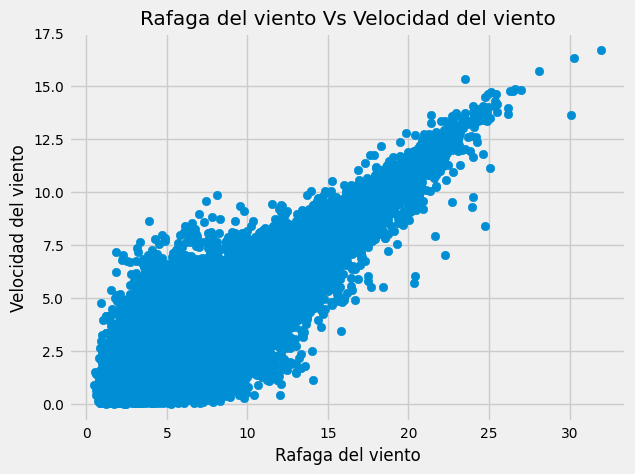

In [81]:
plt.scatter(x=cdjuarezML['rafaga_viento'], y=cdjuarezML['vel_viento'])
plt.title('Rafaga del viento Vs Velocidad del viento')
plt.xlabel('Rafaga del viento')
plt.ylabel('Velocidad del viento')
plt.show()

# Entrenamiento del modelo


In [82]:
datos_entrenamiento = cdjuarezML.sample(frac=0.8, random_state=0)
datos_test = cdjuarezML.drop(datos_entrenamiento.index)

datos_entrenamiento

time_num_usa  viento_U  viento_V  pto_rocio  tem_viento     alt_nube  \
37896          38105 -3.534210  2.340012  -2.331946   23.692346  5208.393555   
74250          39619 -5.925171  0.034805  11.053552   30.010889  4100.225235   
59757          39015  4.835846  1.121628  12.362146   21.528986  1352.343384   
177466         43920  3.383179  1.269394  -4.266638   12.127374  9131.368164   
205705         45097  5.585907  0.587860   3.599084   36.665857  5312.554199   
...              ...       ...       ...        ...         ...          ...   
191385         44500  2.427872  0.937912  -1.125983   15.394098  4100.225235   
99082          40654  2.204514  1.140381  -5.350195   15.691919  8317.408203   
161997         43275  7.855988 -1.026810   6.496790   36.706750  4100.225235   
193632         44594  3.478302  1.052429  -7.944678   16.525232  3375.863281   
170293         43621 -0.825485 -1.128815  11.181970   17.088708  4100.225235   

         evaporacion  rafaga_viento    evap_media  evap_media_potencial  \
37896  -3.540000e-06       9.194188 -9.760000e-07             -0.000125   
74250  -7.100000e-06      10.899548 -1.970000e-06             -0.000206   
59757  -2.028860e-04       9.522625 -5.640000e-05             -0.000102   
177466 -7.670000e-06       6.438713 -2.130000e-06             -0.000004   
205705 -6.410000e-06       9.760191 -1.780000e-06             -0.000158   
...              ...            ...           ...                   ...   
191385 -4.660000e-07       4.806117 -1.330000e-07             -0.000003   
99082  -5.670000e-07       5.565125 -1.560000e-07             -0.000006   
161997 -1.090000e-05      14.948842 -3.030000e-06             -0.000268   
193632 -9.230000e-06       7.654892 -2.560000e-06             -0.000058   
170293 -4.490000e-06       3.235193 -1.250000e-06             -0.000002   

        pm_nivel_del_mar  evap_potencial  tip_precipitacion  temp_del_suelo  \
37896        1013.154375       -0.000451                  0       29.548730   
74250        1014.740625       -0.000742                  0       36.602014   
59757        1011.158125       -0.000366                  1       21.420557   
177466       1012.865000       -0.000013                  0       10.157190   
205705       1006.946250       -0.000567                  0       41.359094   
...                  ...             ...                ...             ...   
191385       1012.696875       -0.000009                  0       14.108057   
99082        1009.915000       -0.000022                  0       15.720239   
161997       1005.112500       -0.000966                  0       44.203241   
193632       1005.415000       -0.000208                  0       17.690393   
170293       1013.236250       -0.000007                  0       17.853235   

        agua_del_suelo  nubosidad  precip_acum_x_hora  angulo_viento  \
37896         0.022686   0.974762            0.000000            124   
74250         0.015940   0.001892            0.000000             90   
59757         0.110263   0.355682            0.004768            257   
177466        0.039522   0.995239            0.000000            249   
205705        0.007525   1.000000            0.000000            264   
...                ...        ...                 ...            ...   
191385        0.027446   0.000000            0.000000            249   
99082         0.016287   0.405151            0.000000            243   
161997        0.020855   0.005249            0.000000            277   
193632        0.027882   0.928894            0.000000            253   
170293        0.040910   0.159973            0.000000             36   

        dir_viento  vel_viento  
37896            2    4.238667  
74250            1    5.925273  
59757            5    4.964217  
177466           5    3.613483  
205705           5    5.616755  
...            ...         ...  
191385           5    2.602737  
99082            4    2.482005  
161997           5    7.922807  
19

In [83]:
etiquetas_entranamiento = datos_entrenamiento.pop('alt_nube')
etiquetas_test = datos_test.pop('alt_nube')

etiquetas_entranamiento

37896     5208.393555
74250     4100.225235
59757     1352.343384
177466    9131.368164
205705    5312.554199
             ...     
191385    4100.225235
99082     8317.408203
161997    4100.225235
193632    3375.863281
170293    4100.225235
Name: alt_nube, Length: 167539, dtype: float64

In [84]:
datos_entrenamiento

time_num_usa  viento_U  viento_V  pto_rocio  tem_viento   evaporacion  \
37896          38105 -3.534210  2.340012  -2.331946   23.692346 -3.540000e-06   
74250          39619 -5.925171  0.034805  11.053552   30.010889 -7.100000e-06   
59757          39015  4.835846  1.121628  12.362146   21.528986 -2.028860e-04   
177466         43920  3.383179  1.269394  -4.266638   12.127374 -7.670000e-06   
205705         45097  5.585907  0.587860   3.599084   36.665857 -6.410000e-06   
...              ...       ...       ...        ...         ...           ...   
191385         44500  2.427872  0.937912  -1.125983   15.394098 -4.660000e-07   
99082          40654  2.204514  1.140381  -5.350195   15.691919 -5.670000e-07   
161997         43275  7.855988 -1.026810   6.496790   36.706750 -1.090000e-05   
193632         44594  3.478302  1.052429  -7.944678   16.525232 -9.230000e-06   
170293         43621 -0.825485 -1.128815  11.181970   17.088708 -4.490000e-06   

        rafaga_viento    evap_media  evap_media_potencial  pm_nivel_del_mar  \
37896        9.194188 -9.760000e-07             -0.000125       1013.154375   
74250       10.899548 -1.970000e-06             -0.000206       1014.740625   
59757        9.522625 -5.640000e-05             -0.000102       1011.158125   
177466       6.438713 -2.130000e-06             -0.000004       1012.865000   
205705       9.760191 -1.780000e-06             -0.000158       1006.946250   
...               ...           ...                   ...               ...   
191385       4.806117 -1.330000e-07             -0.000003       1012.696875   
99082        5.565125 -1.560000e-07             -0.000006       1009.915000   
161997      14.948842 -3.030000e-06             -0.000268       1005.112500   
193632       7.654892 -2.560000e-06             -0.000058       1005.415000   
170293       3.235193 -1.250000e-06             -0.000002       1013.236250   

        evap_potencial  tip_precipitacion  temp_del_suelo  agua_del_suelo  \
37896        -0.000451                  0       29.548730        0.022686   
74250        -0.000742                  0       36.602014        0.015940   
59757        -0.000366                  1       21.420557        0.110263   
177466       -0.000013                  0       10.157190        0.039522   
205705       -0.000567                  0       41.359094        0.007525   
...                ...                ...             ...             ...   
191385       -0.000009                  0       14.108057        0.027446   
99082        -0.000022                  0       15.720239        0.016287   
161997       -0.000966                  0       44.203241        0.020855   
193632       -0.000208                  0       17.690393        0.027882   
170293       -0.000007                  0       17.853235        0.040910   

        nubosidad  precip_acum_x_hora  angulo_viento  dir_viento  vel_viento  
37896    0.974762            0.000000            124           2    4.238667  
74250    0.001892            0.000000             90           1    5.925273  
59757    0.355682            0.004768            257           5    4.964217  
177466   0.995239            0.000000            249           5    3.613483  
205705   1.000000            0.000000            264           5    5.616755  
...           ...                 ...            ...         ...         ...  
191385   0.000000            0.000000            249           5    2.602737  
99082    0.405151            0.000000            243           4    2.482005  
161997   0.005249            0.000000            277           5    7.922807  
193632   0.928894            0.000000            253           5    3.634032  
170293   0.159973            0.000000             36           6    1.398445  

[167539 rows x 19 columns]

In [85]:
modelo = LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entranamiento)

LinearRegression()

In [86]:
predicciones = modelo.predict(datos_test)
predicciones

array([4445.91538008, 3707.31995651, 2904.48794598, ..., 3742.62244414,
       3724.89503999, 3749.20564733])

In [87]:
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual: %f" % (error*100))

Error porcentual: 156865.488978


In [88]:
temp_suelo = pd.DataFrame(np.array([[]]))